In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import datetime
from dateutil import parser
import numpy as np


## Exploartory Dataset

In [53]:
dataset = pd.read_csv('covid19-indonesia.csv')

In [54]:
dataset.head()

,Unnamed: 0,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),...,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
0,3/2/2020,2,0.0,2.0,2,2.0,100.00%,0,0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/3/2020,0,0.0,0.0,2,2.0,100.00%,0,0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/4/2020,0,0.0,0.0,2,2.0,100.00%,0,0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/5/2020,0,0.0,0.0,2,2.0,100.00%,0,0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/6/2020,2,0.0,2.0,4,4.0,100.00%,0,0,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df = dataset[['Unnamed: 0','Kasus aktif']]
df = df.dropna()

In [56]:
datetime_list = []
for date in df['Unnamed: 0']:
    month, day, year = date.split('/')
    date_format = f'{year}-{month}-{day}'
    new_date = parser.parse(date_format).date()
    datetime_list.append(new_date)

In [57]:
df['date'] = datetime_list
df['Kasus aktif'] = df['Kasus aktif'].astype('int')
df = df.drop(['Unnamed: 0'], axis=1)

In [58]:
df = df.set_index('date')

In [59]:
df.head()

,Kasus aktif
date,
2020-03-02,2
2020-03-03,2
2020-03-04,2
2020-03-05,2
2020-03-06,4


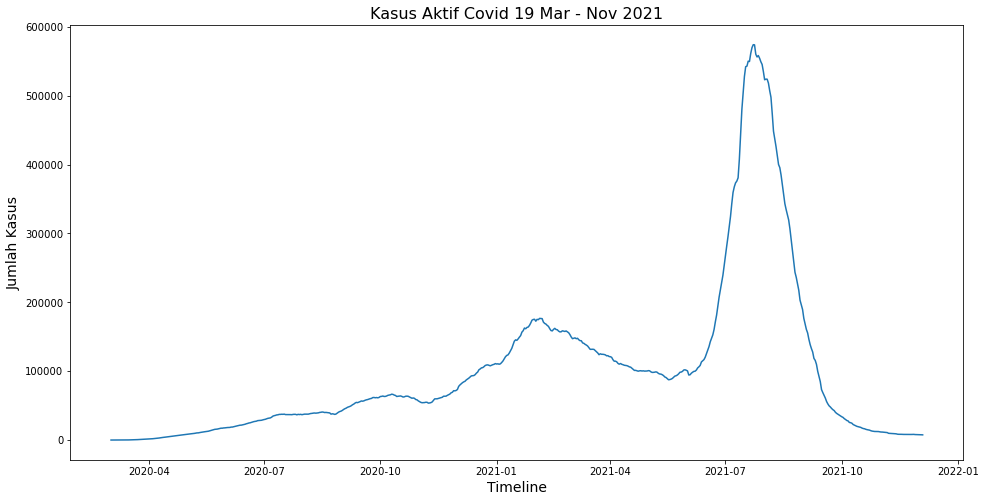

In [60]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(df['Kasus aktif'].astype('int'))
plt.title('Kasus Aktif Covid 19 Mar - Nov 2021', fontsize=16)
plt.xlabel('Timeline', fontsize=14)
plt.ylabel('Jumlah Kasus', fontsize=14)
plt.show()

## Preprocessing Dataset

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
dataset = df['Kasus aktif'].astype('int').values.reshape(-1,1)

In [63]:
scaler = MinMaxScaler(feature_range=(0,1))

In [64]:
scaled_dataset = scaler.fit_transform(dataset)

In [65]:
train_data = scaled_dataset[:len(scaled_dataset)-30]

In [66]:
x_train = []
y_train = []

In [40]:
prediction_days = 30
lenght_dataset = len(train_data)
for x in range(prediction_days,lenght_dataset):
    x_train.append(scaled_dataset[x-prediction_days:x, 0])
    y_train.append(scaled_dataset[x, 0])
    

In [41]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((583, 30), (583,))

In [42]:
x_train = np.expand_dims(x_train, axis=-1)
x_train.shape

(583, 30, 1)

In [43]:
x_train.shape[1],x_train.shape[2]

(30, 1)

## Model

In [44]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.3),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.3),
    Dense(1)
])

In [45]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
model.fit(x_train, y_train, epochs=25)

Epoch 1/25
19/19 [==============================] - 7s 28ms/step - loss: 0.0300
Epoch 2/25
19/19 [==============================] - 0s 19ms/step - loss: 0.0090
Epoch 3/25
19/19 [==============================] - 0s 18ms/step - loss: 0.0069
Epoch 4/25
19/19 [==============================] - 0s 19ms/step - loss: 0.0045
Epoch 5/25
19/19 [==============================] - 0s 18ms/step - loss: 0.0039
Epoch 6/25
19/19 [==============================] - 0s 18ms/step - loss: 0.0035
Epoch 7/25
19/19 [==============================] - 0s 19ms/step - loss: 0.0022
Epoch 8/25
19/19 [==============================] - 0s 19ms/step - loss: 0.0039
Epoch 9/25
19/19 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 10/25
19/19 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 11/25
19/19 [==============================] - 0s 18ms/step - loss: 0.0021
Epoch 12/25
19/19 [==============================] - 0s 18ms/step - loss: 0.0018
Epoch 13/25
19/19 [==================

## Testing

In [109]:
test_data = scaled_dataset[len(scaled_dataset)-30-30:]

In [110]:
x_test = []

In [111]:
for x in range(30, len(test_data)):
    x_test.append(scaled_dataset[x-prediction_days:x, 0])

In [112]:
x_test = np.array(x_test)
x_test = np.expand_dims(x_test, axis=-1)
x_test.shape

(30, 30, 1)

In [113]:
predicted = model.predict(x_test)

In [124]:
predicted.shape

(30, 1)

In [115]:
predicted = scaler.inverse_transform(predicted)

In [116]:
predicted = np.abs(predicted)

In [127]:
actual_data = dataset[len(scaled_dataset)-30:]

In [128]:
actual_data.shape

(30, 1)

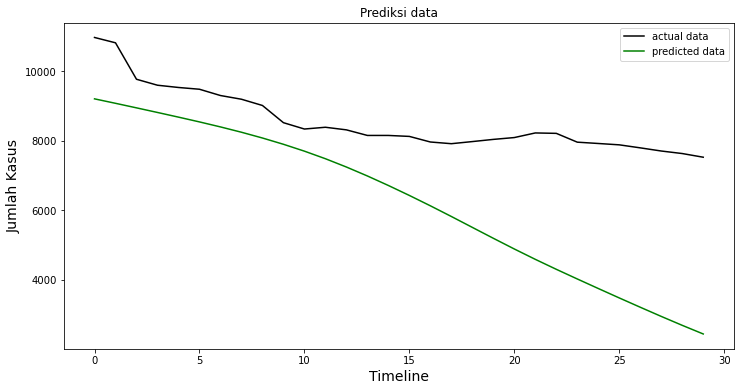

In [129]:
plt.figure(figsize=(12,6))
plt.plot(actual_data, color="black", label="actual data")
plt.plot(predicted, color="green", label="predicted data")
plt.title("Prediksi data")
plt.xlabel('Timeline', fontsize=14)
plt.ylabel('Jumlah Kasus', fontsize=14)
plt.legend()
plt.show()